In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("raghadalharbi/all-products-available-on-sephora-website")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\calan\.cache\kagglehub\datasets\raghadalharbi\all-products-available-on-sephora-website\versions\1


In [2]:
import pandas as pd
df = pd.read_csv(r"C:\Users\calan\Desktop\HTML\spotify\sephora_website_dataset.csv")
df.head()

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,...,True,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,...,True,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0


In [3]:
df.isna().sum()

id                        0
brand                     0
category                  0
name                      0
size                      0
rating                    0
number_of_reviews         0
love                      0
price                     0
value_price               0
URL                       0
MarketingFlags            0
MarketingFlags_content    0
options                   0
details                   0
how_to_use                0
ingredients               0
online_only               0
exclusive                 0
limited_edition           0
limited_time_offer        0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9168 entries, 0 to 9167
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      9168 non-null   int64  
 1   brand                   9168 non-null   object 
 2   category                9168 non-null   object 
 3   name                    9168 non-null   object 
 4   size                    9168 non-null   object 
 5   rating                  9168 non-null   float64
 6   number_of_reviews       9168 non-null   int64  
 7   love                    9168 non-null   int64  
 8   price                   9168 non-null   float64
 9   value_price             9168 non-null   float64
 10  URL                     9168 non-null   object 
 11  MarketingFlags          9168 non-null   bool   
 12  MarketingFlags_content  9168 non-null   object 
 13  options                 9168 non-null   object 
 14  details                 9168 non-null   

In [5]:
# Count products per category
category_counts = df['category'].value_counts().reset_index()

# Rename columns for clarity
category_counts.columns = ['category', 'product_count']

# Display table
category_counts


,category,product_count
0,Perfume,665
1,Moisturizers,451
2,Face Serums,384
3,Value & Gift Sets,378
4,Face Wash & Cleansers,247
...,...,...
138,Spa Tools,1
139,Body Moisturizers,1
140,Lip Treatments,1
141,Powder Brush,1


In [6]:
# Group by category and sum up number of reviews
reviews_by_category = df.groupby('category')['number_of_reviews'].sum().reset_index()

# Sort by total reviews (descending)
reviews_by_category = reviews_by_category.sort_values(by='number_of_reviews', ascending=False)

# Rename columns for clarity
reviews_by_category.columns = ['category', 'total_reviews']

# Display table
reviews_by_category


,category,total_reviews
70,Foundation,222108
111,Mascara,161049
116,Moisturizers,139533
103,Lipstick,104707
52,Eyeliner,103535
...,...,...
84,Hair Styling & Treatments,20
29,Cologne Gift Sets,17
0,Accessories,16
40,Diffusers,12


In [7]:
pip install xgboost


In [8]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install numpy==2.1.0

In [13]:
# Convert MarketingFlags boolean to int
df['MarketingFlags'] = df['MarketingFlags'].astype(int)

# If you want all features consistent for XGBoost
X = df[['rating', 'number_of_reviews', 'price',
        'MarketingFlags', 'exclusive', 'limited_edition', 'limited_time_offer']].copy()

# Cast everything to float32 for safety
X = X.astype('float32')

# Define target (proxy revenue)
y = (df['price'] * df['number_of_reviews']).astype('float32')


In [15]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
import shap

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    tree_method='hist'
)
model.fit(X_train, y_train)

# SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_test)

import numpy as np
weights = np.abs(shap_values.values).mean(axis=0)
weights_df = pd.DataFrame({
    'feature': X.columns,
    'weight': weights / weights.sum()
}).sort_values('weight', ascending=False)

weights_df


,feature,weight
1,number_of_reviews,0.704585
2,price,0.281844
0,rating,0.006973
4,exclusive,0.004077
3,MarketingFlags,0.002370
5,limited_edition,0.000138
6,limited_time_offer,0.000011


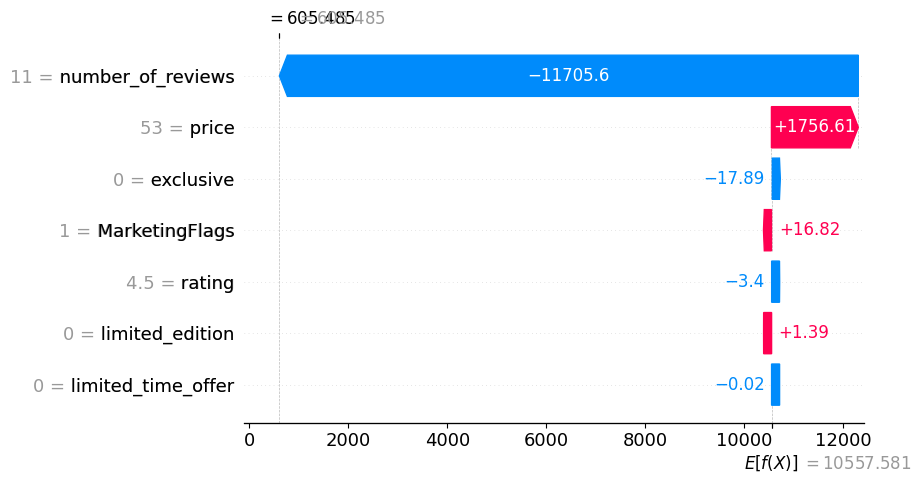

In [18]:
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

In [21]:
import numpy as np
import pandas as pd

# If shap_values is a shap.Explanation object (newer versions):
vals = shap_values.values if hasattr(shap_values, "values") else shap_values

# Mean absolute SHAP value for each feature (global importance)
mean_abs_shap = np.abs(vals).mean(axis=0)

# Create DataFrame with both raw SHAP importance and normalized weights
shap_weights = pd.DataFrame({
    'feature': X.columns,
    'shap_importance': mean_abs_shap,
    'weight': mean_abs_shap / mean_abs_shap.sum()
}).sort_values(by='weight', ascending=False).reset_index(drop=True)

shap_weights


,feature,shap_importance,weight
0,number_of_reviews,13545.349609,0.704585
1,price,5418.323730,0.281844
2,rating,134.061310,0.006973
3,exclusive,78.385666,0.004077
4,MarketingFlags,45.569725,0.002370
5,limited_edition,2.661039,0.000138
6,limited_time_offer,0.217311,0.000011


In [25]:
# Count number of products per category
category_counts = df['category'].value_counts()

# Get the top 10 categories
top10_categories = category_counts.head(10).index.tolist()
print("Top 10 Categories:", top10_categories)

# Filter dataframe for only these categories
df_top10_cat = df[df['category'].isin(top10_categories)].copy()

# Check shape
print("Original dataset size:", df.shape)
print("Top 10 categories dataset size:", df_top10_cat.shape)


Top 10 Categories: ['Perfume', 'Moisturizers', 'Face Serums', 'Value & Gift Sets', 'Face Wash & Cleansers', 'Face Masks', 'Rollerballs & Travel Size', 'Hair Styling Products', 'Eye Palettes', 'Lipstick']
Original dataset size: (9168, 21)
Top 10 categories dataset size: (3200, 21)


In [28]:
# Group categories by total number of reviews
reviews_by_category = (
    df.groupby('category')['number_of_reviews']
    .sum()
    .sort_values(ascending=False)
)

# Get top 10 categories by total reviews
top10_categories_reviews = reviews_by_category.head(10).index.tolist()
print("Top 10 Categories by Reviews:", top10_categories_reviews)

# Filter dataframe for only these categories
df_top10_reviews = df[df['category'].isin(top10_categories_reviews)].copy()

# Quick check
print("Original dataset size:", df.shape)
print("Top 10 categories (by reviews) dataset size:", df_top10_reviews.shape)


Top 10 Categories by Reviews: ['Foundation', 'Mascara', 'Moisturizers', 'Lipstick', 'Eyeliner', 'Perfume', 'Face Wash & Cleansers', 'Face Primer', 'Face Serums', 'Makeup']
Original dataset size: (9168, 21)
Top 10 categories (by reviews) dataset size: (2634, 21)


In [30]:
# Top 10 by product count
top10_count = df['category'].value_counts().head(10).index.tolist()

# Top 10 by total reviews
top10_reviews = (
    df.groupby('category')['number_of_reviews']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index.tolist()
)

# Add flags to df
df['top10_by_count'] = df['category'].isin(top10_count).astype(int)
df['top10_by_reviews'] = df['category'].isin(top10_reviews).astype(int)

# Quick check
df[['category', 'top10_by_count', 'top10_by_reviews']].head(20)


,category,top10_by_count,top10_by_reviews
0,Fragrance,0,0
1,Cologne,0,0
2,Perfume,1,1
3,Perfume,1,1
4,Fragrance,0,0
5,Perfume,1,1
6,Perfume,1,1
7,Cologne,0,0
8,Body Mist & Hair Mist,0,0
9,Perfume,1,1


In [32]:
# Top 10 by product count
top10_count = df['category'].value_counts().head(10).reset_index()
top10_count.columns = ['category_count', 'product_count']

# Top 10 by total reviews
top10_reviews = (
    df.groupby('category')['number_of_reviews']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)
top10_reviews.columns = ['category_reviews', 'total_reviews']

# Combine side by side
top10_comparison = pd.concat([top10_count, top10_reviews], axis=1)

top10_comparison


,category_count,product_count,category_reviews,total_reviews
0,Perfume,665,Foundation,222108
1,Moisturizers,451,Mascara,161049
2,Face Serums,384,Moisturizers,139533
3,Value & Gift Sets,378,Lipstick,104707
4,Face Wash & Cleansers,247,Eyeliner,103535
5,Face Masks,230,Perfume,100207
6,Rollerballs & Travel Size,228,Face Wash & Cleansers,97794
7,Hair Styling Products,224,Face Primer,95052
8,Eye Palettes,202,Face Serums,94270
9,Lipstick,191,Makeup,91417


In [34]:
import numpy as np
import pandas as pd

def compute_pvs_core(df):
    d = df.copy()

    # clean numeric
    d['number_of_reviews'] = pd.to_numeric(d['number_of_reviews'], errors='coerce').fillna(0)
    d['price'] = pd.to_numeric(d['price'], errors='coerce').fillna(0)
    d['rating'] = pd.to_numeric(d['rating'], errors='coerce').fillna(0)

    # scale features
    r_log = np.log1p(d['number_of_reviews'])
    r_scaled = r_log / (r_log.max() if r_log.max() > 0 else 1)

    p_scaled = d['price'] / (d['price'].max() + 1e-9)
    s_scaled = d['rating'] / 5.0

    # weights (SHAP global importances)
    w_reviews = 0.704585
    w_price   = 0.281844
    w_rating  = 0.006973

    score = (w_reviews * r_scaled +
             w_price   * p_scaled +
             w_rating  * s_scaled)

    # normalize 0..100
    d['PVS_core'] = 100 * (score - score.min()) / (score.max() - score.min() + 1e-9)
    return d

# Apply
df = compute_pvs_core(df)

# Top products
df[['brand','name','category','rating','number_of_reviews','price','PVS_core']] \
    .sort_values('PVS_core', ascending=False) \
    .head(10)



,brand,name,category,rating,number_of_reviews,price,PVS_core
2589,dyson,Airwrap™ Styler,Hair Straighteners & Flat Irons,4.0,496,549.0,100.000000
519,bareMinerals,Original Loose Powder Mineral Foundation Broad...,Foundation,4.5,19000,32.0,99.431607
5842,NARS,Blush,Blush,4.5,17000,30.0,98.199205
4600,KVD Vegan Beauty,Tattoo Eyeliner,Eyeliner,4.0,17000,21.0,97.469464
2821,FENTY BEAUTY by Rihanna,Pro Filt'r Soft Matte Longwear Foundation,Foundation,4.0,15000,35.0,97.227500
4601,KVD Vegan Beauty,Lock-It Foundation,Foundation,4.0,14000,37.0,96.691354
710,Benefit Cosmetics,They’re Real! Lengthening & Volumizing Mascara,Mascara,4.0,15000,25.0,96.522998
8343,Too Faced,Better Than Sex Mascara,Mascara,3.5,15000,25.0,96.427308
8463,Urban Decay,24/7 Glide-On Eye Pencil,Eyeliner,4.5,15000,22.0,96.407337
272,Anastasia Beverly Hills,Brow Wiz,Eyebrow,4.5,14000,23.0,95.800742


In [36]:
# Top 15 products by PVS_core
top15_products = (
    df[['brand','name','category','rating','number_of_reviews','price','PVS_core']]
    .sort_values('PVS_core', ascending=False)
    .head(15)
    .reset_index(drop=True)
)

top15_products


,brand,name,category,rating,number_of_reviews,price,PVS_core
0,dyson,Airwrap™ Styler,Hair Straighteners & Flat Irons,4.0,496,549.0,100.000000
1,bareMinerals,Original Loose Powder Mineral Foundation Broad...,Foundation,4.5,19000,32.0,99.431607
2,NARS,Blush,Blush,4.5,17000,30.0,98.199205
3,KVD Vegan Beauty,Tattoo Eyeliner,Eyeliner,4.0,17000,21.0,97.469464
4,FENTY BEAUTY by Rihanna,Pro Filt'r Soft Matte Longwear Foundation,Foundation,4.0,15000,35.0,97.227500
5,KVD Vegan Beauty,Lock-It Foundation,Foundation,4.0,14000,37.0,96.691354
6,Benefit Cosmetics,They’re Real! Lengthening & Volumizing Mascara,Mascara,4.0,15000,25.0,96.522998
7,Too Faced,Better Than Sex Mascara,Mascara,3.5,15000,25.0,96.427308
8,Urban Decay,24/7 Glide-On Eye Pencil,Eyeliner,4.5,15000,22.0,96.407337
9,Anastasia Beverly Hills,Brow Wiz,Eyebrow,4.5,14000,23.0,95.800742


In [38]:
# Average PVS_core per category
top15_categories = (
    df.groupby('category', as_index=False)['PVS_core']
      .mean()
      .sort_values('PVS_core', ascending=False)
      .head(15)
      .reset_index(drop=True)
)

top15_categories


,category,PVS_core
0,Foundation,63.370502
1,Mascara,59.279593
2,Concealer,58.441475
3,BB & CC Cream,58.413688
4,Eye Primer,54.637754
5,Face Primer,53.807965
6,Facial Peels,53.749868
7,BB & CC Creams,53.507470
8,Hair Thinning & Hair Loss,52.786473
9,Setting Spray & Powder,52.501016


In [40]:
# Top 15 categories by product count
top15_categories_count = (
    df['category'].value_counts()
    .head(15)
    .reset_index()
    .rename(columns={'index':'category','category':'product_count'})
)
top15_categories_count


,product_count,count
0,Perfume,665
1,Moisturizers,451
2,Face Serums,384
3,Value & Gift Sets,378
4,Face Wash & Cleansers,247
5,Face Masks,230
6,Rollerballs & Travel Size,228
7,Hair Styling Products,224
8,Eye Palettes,202
9,Lipstick,191


In [42]:
# Top 15 categories by total reviews
top15_categories_reviews = (
    df.groupby('category')['number_of_reviews']
      .sum()
      .sort_values(ascending=False)
      .head(15)
      .reset_index()
      .rename(columns={'number_of_reviews':'total_reviews'})
)
top15_categories_reviews


,category,total_reviews
0,Foundation,222108
1,Mascara,161049
2,Moisturizers,139533
3,Lipstick,104707
4,Eyeliner,103535
5,Perfume,100207
6,Face Wash & Cleansers,97794
7,Face Primer,95052
8,Face Serums,94270
9,Makeup,91417


In [44]:
# Filter main df to only those categories
focus_categories = top15_categories_reviews['category'].tolist()
df_focus = df[df['category'].isin(focus_categories)].copy()


In [46]:
top15_products_focus = (
    df_focus[['brand','name','category','rating','number_of_reviews','price','PVS_core']]
    .sort_values('PVS_core', ascending=False)
    .head(15)
    .reset_index(drop=True)
)
top15_products_focus


,brand,name,category,rating,number_of_reviews,price,PVS_core
0,bareMinerals,Original Loose Powder Mineral Foundation Broad...,Foundation,4.5,19000,32.0,99.431607
1,KVD Vegan Beauty,Tattoo Eyeliner,Eyeliner,4.0,17000,21.0,97.469464
2,FENTY BEAUTY by Rihanna,Pro Filt'r Soft Matte Longwear Foundation,Foundation,4.0,15000,35.0,97.227500
3,KVD Vegan Beauty,Lock-It Foundation,Foundation,4.0,14000,37.0,96.691354
4,Benefit Cosmetics,They’re Real! Lengthening & Volumizing Mascara,Mascara,4.0,15000,25.0,96.522998
5,Too Faced,Better Than Sex Mascara,Mascara,3.5,15000,25.0,96.427308
6,Urban Decay,24/7 Glide-On Eye Pencil,Eyeliner,4.5,15000,22.0,96.407337
7,Anastasia Beverly Hills,Brow Wiz,Eyebrow,4.5,14000,23.0,95.800742
8,KVD Vegan Beauty,Everlasting Liquid Lipstick,Lipstick,4.5,14000,21.0,95.659842
9,Too Faced,Better Than Sex Mascara Mini,Makeup,3.5,13000,13.0,94.177624


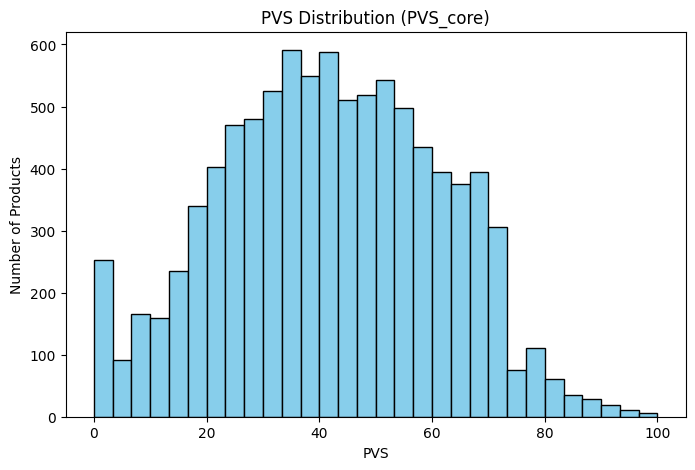

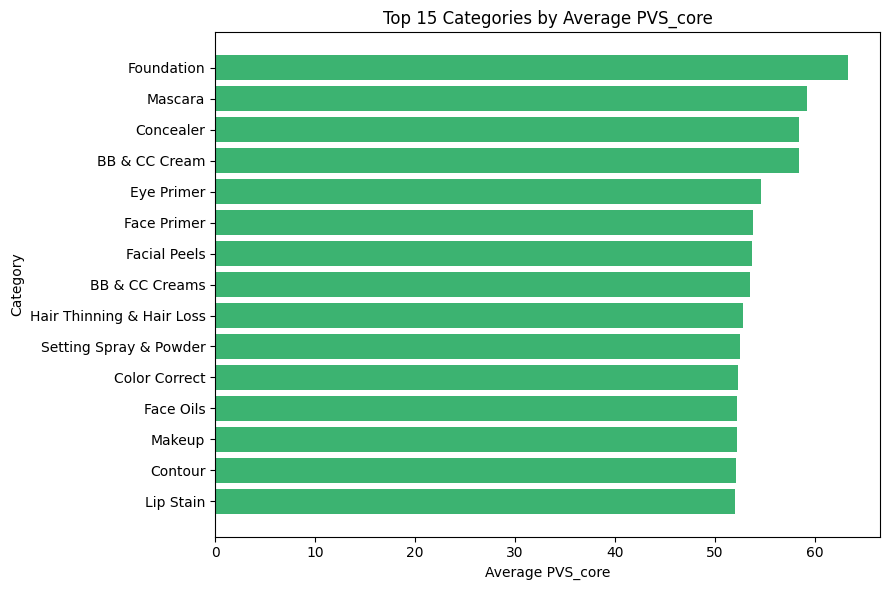

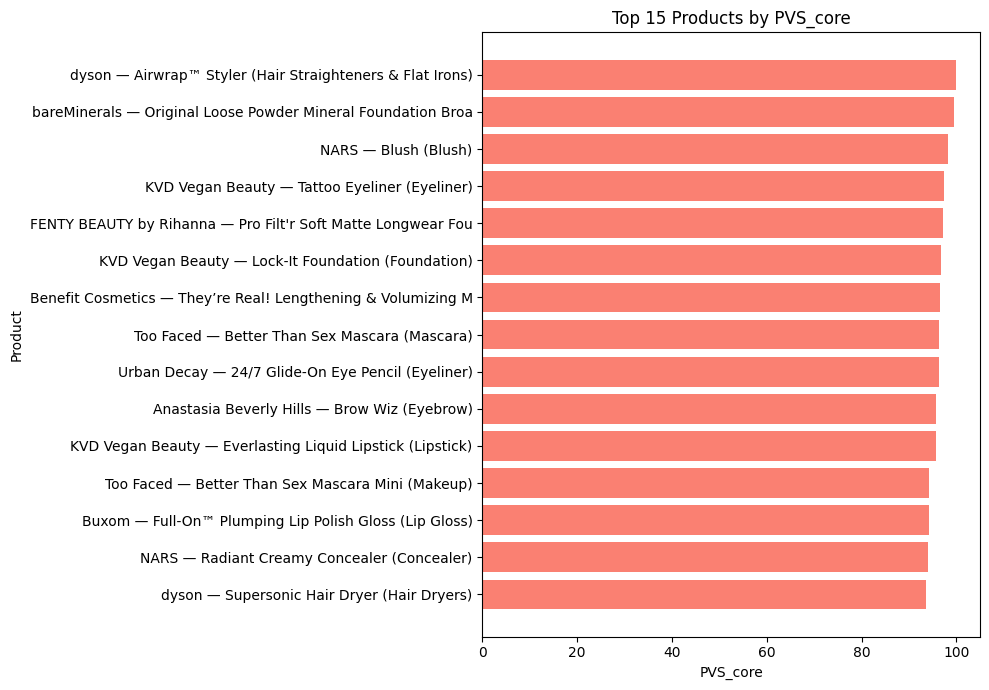

In [53]:
import matplotlib.pyplot as plt

use_col = 'PVS_core'
assert use_col in df.columns, f"{use_col} column not found in df"

plt.figure(figsize=(8,5))
plt.hist(df[use_col].dropna(), bins=30, color="skyblue", edgecolor="black")
plt.title(f"PVS Distribution ({use_col})")
plt.xlabel("PVS")
plt.ylabel("Number of Products")
plt.show()


top15_cat = (df.groupby('category')[use_col]
               .mean()
               .sort_values(ascending=False)
               .head(15))

plt.figure(figsize=(9,6))
plt.barh(top15_cat.index[::-1], top15_cat.values[::-1], color="mediumseagreen")
plt.title(f"Top 15 Categories by Average {use_col}")
plt.xlabel(f"Average {use_col}")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

prod_cols = ['brand','name','category','rating','number_of_reviews','price', use_col]
top15_products = (df[prod_cols]
                  .dropna(subset=[use_col])
                  .sort_values(use_col, ascending=False)
                  .head(15)
                  .reset_index(drop=True))

labels = (top15_products['brand'].astype(str) + " — " + 
          top15_products['name'].astype(str) + " (" + 
          top15_products['category'].astype(str) + ")").str.slice(0,60)

plt.figure(figsize=(10,7))
plt.barh(labels.iloc[::-1], top15_products[use_col].iloc[::-1].values, color="salmon")
plt.title(f"Top 15 Products by {use_col}")
plt.xlabel(use_col)
plt.ylabel("Product")
plt.tight_layout()
plt.show()

top15_cat.reset_index().rename(columns={use_col: f'avg_{use_col}'}).to_csv("top15_categories.csv", index=False)
top15_products.to_csv("top15_products.csv", index=False)
